In [2]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
from glob import glob
# from const import ID2LABELS
from const import  ID2LABELS_SMG as ID2LABELS
import numpy as np
from scipy.stats import zscore
import textwrap

In [3]:
# path_to_root = osp.join("D:\\Project-mpg microgesture\\imigue")
# path_to_data = osp.join(path_to_root,"imigue_data_phase1" ,"datasets")
# path_to_valid = osp.join(path_to_data, "imigue_skeleton_validate")
# path_to_train = osp.join(path_to_data, "imigue_skeleton_train")

dataset = 'train'
path_to_data = f'../../smg/smg_data_phase1/smg_skeleton_{dataset}'
path_to_data = osp.join(*path_to_data.split('/'))



In [4]:
def extract_all_labels_files(path_to_folder, suffix=None):
    if suffix is None:
        suffix = '*_label.csv'
    all_csv_files = glob(osp.join(path_to_folder,'**',suffix))
    df_list = []
    column_names = ["label","start_frame","end_frame"]
    rows = ['filename','file_num']
    for csv_file in all_csv_files:
        temp_df = pd.read_csv(csv_file, header=None, names=column_names)
        
        temp_df['filename'] = osp.basename(csv_file).split('_')[0]
        temp_df['file_num'] = [str(x) for x in range(len(temp_df))]
        temp_df['id'] = temp_df[rows].apply(lambda x: '_'.join(x.values.astype(str)), axis=1)
        df_list.append(temp_df)
    return pd.concat(df_list)
df = extract_all_labels_files(path_to_data, suffix='*labels.csv')
df['label_text'] = df['label'].apply(lambda x: f'{x}_{ID2LABELS[x]}')
    
    

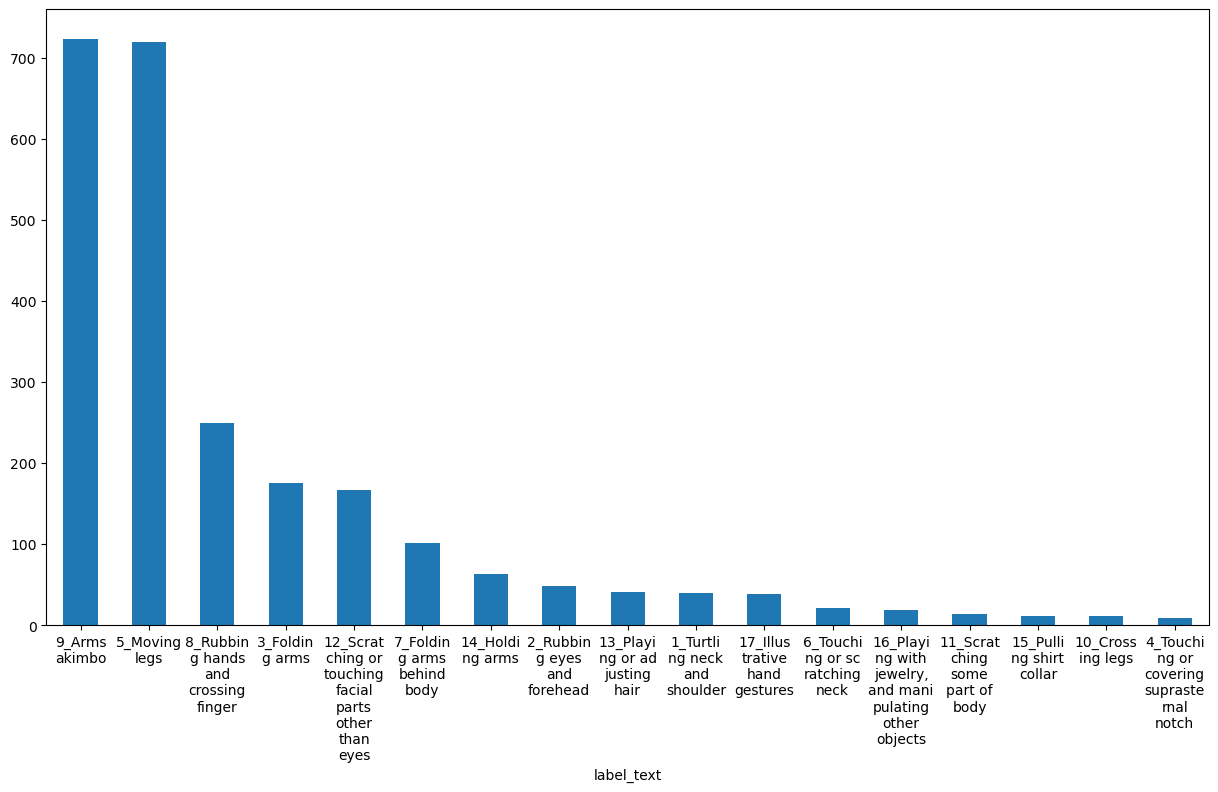

In [9]:
fig, ax = plt.subplots(
    figsize=(15,8)
)
# h = plt.hist(df['label_text'], width=2)
label_counts = df['label_text'].value_counts()
label_counts.plot(kind='bar')
# Wrap the tick labels if they are too long
wrapped_labels = [textwrap.fill(label, width=8) for label in label_counts.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, rotation=0)

plt.show()

In [10]:
df['label_text'].value_counts()

label_text
9_Arms akimbo                                              724
5_Moving legs                                              720
8_Rubbing hands and crossing finger                        249
3_Folding arms                                             175
12_Scratching or touching facial parts other than eyes     167
7_Folding arms behind body                                 101
14_Holding arms                                             63
2_Rubbing eyes and forehead                                 48
13_Playing or adjusting hair                                41
1_Turtling neck and shoulder                                40
17_Illustrative hand gestures                               39
6_Touching or scratching neck                               21
16_Playing with jewelry, and manipulating other objects     19
11_Scratching some part of body                             14
15_Pulling shirt collar                                     11
10_Crossing legs                            

In [11]:
df

,label,start_frame,end_frame,filename,file_num,id,label_text
0,15,100,176,Sample0001,0,Sample0001_0,15_Pulling shirt collar
1,12,837,889,Sample0001,1,Sample0001_1,12_Scratching or touching facial parts other t...
2,12,1710,1749,Sample0001,2,Sample0001_2,12_Scratching or touching facial parts other t...
3,8,4849,4885,Sample0001,3,Sample0001_3,8_Rubbing hands and crossing finger
4,9,6330,6368,Sample0001,4,Sample0001_4,9_Arms akimbo
...,...,...,...,...,...,...,...
51,9,19190,19278,Sample0030,51,Sample0030_51,9_Arms akimbo
52,9,19413,19510,Sample0030,52,Sample0030_52,9_Arms akimbo
53,9,19555,19680,Sample0030,53,Sample0030_53,9_Arms akimbo
54,9,19686,19752,Sample0030,54,Sample0030_54,9_Arms akimbo


In [12]:
df['n_frames'] = df['end_frame'] - df['start_frame']

In [13]:
df['n_frames']

0      76
1      52
2      39
3      36
4      38
     ... 
51     88
52     97
53    125
54     66
55    119
Name: n_frames, Length: 2452, dtype: int64

In [14]:
# Group by label and compute statistics
# Define functions for calculating z-score and percentiles

def calc_percentile(x, percentile):
    return np.percentile(x, percentile)

label_stats = df.groupby('label_text')['n_frames'].agg(['count','max','min','mean', 'median', 'std',
                                                        lambda x: np.percentile(x, 90), 
                                                        lambda x: np.percentile(x, 10)])

# Rename the lambda functions for better readability
label_stats.columns = ['count','max','min','mean', 'median', 'std', '90th percentile', '10th percentile']

# Display the statistics
# print(label_stats)

In [15]:
label_stats

,count,max,min,mean,median,std,90th percentile,10th percentile
label_text,,,,,,,,
10_Crossing legs,11,179,28,66.272727,55.0,44.880042,110.0,32.0
11_Scratching some part of body,14,99,12,51.214286,46.0,22.292388,84.8,36.1
12_Scratching or touching facial parts other than eyes,167,304,16,68.281437,57.0,47.522967,117.0,26.0
13_Playing or adjusting hair,41,445,22,84.317073,65.0,69.866100,135.0,37.0
14_Holding arms,63,293,16,61.650794,44.0,52.216410,114.0,23.4
15_Pulling shirt collar,11,118,35,64.181818,59.0,24.227332,87.0,38.0
"16_Playing with jewelry, and manipulating other objects",19,228,21,85.157895,58.0,57.807404,151.6,33.6
17_Illustrative hand gestures,39,147,8,37.589744,32.0,23.971165,58.6,18.2
1_Turtling neck and shoulder,40,91,18,42.725000,38.0,18.863868,66.8,21.9


In [ ]:
import pickle
path_to_samples = 'D:\\Project-mpg microgesture\\imigue\\stgcn_imigue_startkit\\data\\iMiGUE\\imigue_processed'
dataset = 'valid'
path_to_labels = osp.join(path_to_samples,f'{dataset}_label.pkl')
path_to_data = osp.join(path_to_samples,f'{dataset}_data.npy')

In [ ]:
with open(path_to_labels, 'rb') as f:
    p= pickle.load(f)

In [ ]:
print(p[0][0:5])
print(p[1][0:5])

In [ ]:
df_label = pd.DataFrame(np.array(p).transpose(), columns=['id','label'])
df_label['label_text'] = df_label['label'].apply(lambda x: ID2LABELS[int(x)])
df_label

In [ ]:

# path_to_np = 'C:\\Users\\gutzc\\GitHub\\human_micro_gesture_classifier\\stgcn_imigue_startkit\\data\\iMiGUE\\imigue_processed\\valid_data.npy'
# loaded_array = np.load(path_to_np)
# loaded_array.shape

In [ ]:
# check if labels are the same

df_comb = df[['id','label','filename','file_num']].merge(df_label[['id','label']], on='id', how='outer')
df_sorted = df_comb.sort_values(['filename', 'file_num'], key=lambda x: x.astype(int))
df_sorted

In [ ]:
len(df)

In [ ]:
len(df_label)